<a href="https://colab.research.google.com/github/JosephHobbs9292/Voter-Classification-and-Feature-Importance/blob/main/RFH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
---

Model One: What characteristics determine why a registered Republican would have voted for a Democrat instead of the Republican candidate 

Question Two: Build a Ne

Question Three: Can the above features be used to predict who a person will vote for in a future election 



Link to dataset: https://www.kaggle.com/datasets/democracy-fund/2016-voter-survey 

## Setup
---

Importing libraries, loading in and creating dataframe, and displaying dataframe to review the imported data. 

In [1]:
## Panda/Numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Sanity  
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Google Colab
from google.colab import files 
 
# Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout
 
# Sci-kit learn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.inspection import permutation_importance

## Shap
!pip install shap
import shap

## Lime 
!pip install lime
from lime.lime_tabular import LimeTabularExplainer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 7.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=62d99deb113638c4d255f67feabae67e90025595b3d4198110e97940b72e2b5e
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [2]:
## Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## Creating Dataframe 
df_voters = pd.read_csv("/content/VOTER_Survey_December16_Release1 - R + HRC.csv")

In [4]:
## Displaying Dataframe
df_voters.head(10)

,case_identifier,PARTY_AGENDAS_rand_2016,presvote16post_2016,accurately_counted_2016,accurately_counted2_2016,fav_trump_2016,fav_obama_2016,fav_hrc_2016,fav_sanders_2016,PARTY_AGENDAS_R1_2016,...,econtrend_2016,Americatrend_2016,futuretrend_2016,wealth_2016,values_culture_2016,US_respect_2016,trustgovt_2016,trust_people_2016,helpful_people_2016,fair_people_2016
0,779,Republican Party,Hillary Clinton,Very confident,Not too confident,Very unfavorable,Very favorable,Very favorable,Very favorable,About the same,...,Getting better,Better,Don't know,Should be more evenly distributed,Holding steady,As respected as in the past,Some of the time,Don't know,People try to be helpful,Don't know
1,2597,Republican Party,Hillary Clinton,Not too confident,Not too confident,Very unfavorable,Very favorable,Very favorable,Somewhat favorable,About the same,...,Getting worse,Better,Better than R's,Should be more evenly distributed,Generally becoming rarer and less accepted,More respected,Some of the time,Can't be too careful in dealing with people,People are looking out for themselves,People would try to take advantage
2,5903,Republican Party,Hillary Clinton,Very confident,Very confident,Very unfavorable,Very favorable,Somewhat favorable,Very favorable,Much less,...,Getting better,About the same,Better than R's,Should be more evenly distributed,Generally becoming rarer and less accepted,As respected as in the past,Some of the time,Most people can be trusted,People are looking out for themselves,People would try to be fair
3,8048,Republican Party,Hillary Clinton,Very confident,Very confident,Very unfavorable,Very favorable,Somewhat favorable,Somewhat favorable,Much less,...,Getting better,About the same,Better than R's,Should be more evenly distributed,Generally becoming more widespread and accepted,Less respected,Some of the time,Most people can be trusted,People try to be helpful,People would try to be fair
4,13112,Republican Party,Hillary Clinton,Somewhat confident,Somewhat confident,Very unfavorable,Very favorable,Very favorable,Somewhat favorable,Somewhat less,...,Getting better,Better,Better than R's,Should be more evenly distributed,Generally becoming rarer and less accepted,Less respected,Some of the time,Can't be too careful in dealing with people,People are looking out for themselves,People would try to take advantage
5,14087,Republican Party,Hillary Clinton,Somewhat confident,Somewhat confident,Very unfavorable,Very favorable,Somewhat favorable,Very favorable,Somewhat less,...,Getting better,Worse,Worse than R's,Should be more evenly distributed,Generally becoming rarer and less accepted,Less respected,Some of the time,Most people can be trusted,People are looking out for themselves,People would try to take advantage
6,14507,Republican Party,Hillary Clinton,Very confident,Not too confident,Very unfavorable,Very favorable,Very favorable,Somewhat favorable,Much less,...,About the same,About the same,Better than R's,Should be more evenly distributed,Generally becoming more widespread and accepted,Less respected,Some of the time,Most people can be trusted,People try to be helpful,People would try to be fair
7,20459,Republican Party,Hillary Clinton,Very confident,Not too confident,Very unfavorable,Somewhat favorable,Somewhat favorable,Somewhat favorable,Somewhat less,...,Don't know,Better,Worse than R's,Should be more evenly distributed,Generally becoming rarer and less accepted,Less respected,Some of the time,Don't know,Don't know,Don't know
8,25193,Republican Party,Hillary Clinton,Not at all confident,Not at all confident,Very unfavorable,Very favorable,Very favorable,Somewhat favorable,Much less,...,Getting worse,Worse,Don't know,Should be more evenly distributed,Don't know,Less respected,Some of the time,Most people can be trusted,People try to be helpful,People would try to be fair
9,2035940,Republican Party,Hillary Clinton,Very confident,Very confident,Very unfavorable,Very favorable,Somewhat unfavorable,Very favorable,About the same,...

In [5]:
## Displaying Dataframe info
df_voters.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   case_identifier           1795 non-null   int64 
 1   PARTY_AGENDAS_rand_2016   1795 non-null   object
 2   presvote16post_2016       1795 non-null   object
 3   accurately_counted_2016   1794 non-null   object
 4   accurately_counted2_2016  1786 non-null   object
 5   fav_trump_2016            1787 non-null   object
 6   fav_obama_2016            1785 non-null   object
 7   fav_hrc_2016              1785 non-null   object
 8   fav_sanders_2016          1785 non-null   object
 9   PARTY_AGENDAS_R1_2016     1761 non-null   object
 10  PARTY_AGENDAS_R2_2016     1764 non-null   object
 11  PARTY_AGENDAS_R3_2016     1762 non-null   object
 12  PARTY_AGENDAS_R4_2016     1763 non-null   object
 13  PARTY_AGENDAS_R5_2016     1765 non-null   object
 14  PARTY_AGENDAS_R6_2016   

## Data Cleaning
---

Removing null values as they represent less than one percent of all rows and converting data to numeric datatype. 

In [6]:
## Checking for null values
df_voters.isnull().sum()

case_identifier              0
PARTY_AGENDAS_rand_2016      0
presvote16post_2016          0
accurately_counted_2016      1
accurately_counted2_2016     9
fav_trump_2016               8
fav_obama_2016              10
fav_hrc_2016                10
fav_sanders_2016            10
PARTY_AGENDAS_R1_2016       34
PARTY_AGENDAS_R2_2016       31
PARTY_AGENDAS_R3_2016       33
PARTY_AGENDAS_R4_2016       32
PARTY_AGENDAS_R5_2016       30
PARTY_AGENDAS_R6_2016       26
PARTY_AGENDAS_R7_2016       34
PARTY_AGENDAS_R8_2016       37
PARTY_AGENDAS_R9_2016       38
PARTY_AGENDAS_R10_2016      37
PARTY_AGENDAS_R11_2016      29
PARTY_AGENDAS_R12_2016      30
track_2016                  19
persfinretro_2016            1
econtrend_2016               6
Americatrend_2016            1
futuretrend_2016             4
wealth_2016                  2
values_culture_2016          1
US_respect_2016              7
trustgovt_2016               8
trust_people_2016           12
helpful_people_2016          7
fair_peo

In [7]:
## Dropping null values
df_voters = df_voters.dropna()
df_voters.isnull().sum()

case_identifier             0
PARTY_AGENDAS_rand_2016     0
presvote16post_2016         0
accurately_counted_2016     0
accurately_counted2_2016    0
fav_trump_2016              0
fav_obama_2016              0
fav_hrc_2016                0
fav_sanders_2016            0
PARTY_AGENDAS_R1_2016       0
PARTY_AGENDAS_R2_2016       0
PARTY_AGENDAS_R3_2016       0
PARTY_AGENDAS_R4_2016       0
PARTY_AGENDAS_R5_2016       0
PARTY_AGENDAS_R6_2016       0
PARTY_AGENDAS_R7_2016       0
PARTY_AGENDAS_R8_2016       0
PARTY_AGENDAS_R9_2016       0
PARTY_AGENDAS_R10_2016      0
PARTY_AGENDAS_R11_2016      0
PARTY_AGENDAS_R12_2016      0
track_2016                  0
persfinretro_2016           0
econtrend_2016              0
Americatrend_2016           0
futuretrend_2016            0
wealth_2016                 0
values_culture_2016         0
US_respect_2016             0
trustgovt_2016              0
trust_people_2016           0
helpful_people_2016         0
fair_people_2016            0
dtype: int

In [8]:
## Creating loop to convert data in confidence columns from Likert scale to numerical values and also converting column to int datatype
columns_confidence = ["accurately_counted_2016", "accurately_counted2_2016"]
for x in columns_confidence:
  df_voters[x] = df_voters[x].replace(["Not at all confident", "Somewhat confident", "Not too confident", "Very confident"], [1,2,3,4])
  df_voters[x] = df_voters[x].astype("int64")



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [9]:
## Creating loop to convert data in favorability columns from Likert scale to numerical values and also converting column to int datatype
columns_favor = ["fav_trump_2016", "fav_obama_2016", "fav_hrc_2016", "fav_sanders_2016"]
for x in columns_favor:
  df_voters[x] = df_voters[x].replace(["Very unfavorable", "Somewhat unfavorable", "Don't know", "Somewhat favorable","Very favorable" ], [1,2,3,4,5])
  df_voters[x] = df_voters[x].astype("int64")
df_voters.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1612 entries, 0 to 1794
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   case_identifier           1612 non-null   int64 
 1   PARTY_AGENDAS_rand_2016   1612 non-null   object
 2   presvote16post_2016       1612 non-null   object
 3   accurately_counted_2016   1612 non-null   int64 
 4   accurately_counted2_2016  1612 non-null   int64 
 5   fav_trump_2016            1612 non-null   int64 
 6   fav_obama_2016            1612 non-null   int64 
 7   fav_hrc_2016              1612 non-null   int64 
 8   fav_sanders_2016          1612 non-null   int64 
 9   PARTY_AGENDAS_R1_2016     1612 non-null   object
 10  PARTY_AGENDAS_R2_2016     1612 non-null   object
 11  PARTY_AGENDAS_R3_2016     1612 non-null   object
 12  PARTY_AGENDAS_R4_2016     1612 non-null   object
 13  PARTY_AGENDAS_R5_2016     1612 non-null   object
 14  PARTY_AGENDAS_R6_2016   


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
## Creating loop to convert data in agenda columns from Likert scale to numerical values and also converting column to int datatype
columns_agenda = ["PARTY_AGENDAS_R1_2016", "PARTY_AGENDAS_R2_2016", "PARTY_AGENDAS_R3_2016", "PARTY_AGENDAS_R4_2016", "PARTY_AGENDAS_R5_2016", "PARTY_AGENDAS_R6_2016", "PARTY_AGENDAS_R7_2016", "PARTY_AGENDAS_R8_2016", "PARTY_AGENDAS_R9_2016", "PARTY_AGENDAS_R10_2016", "PARTY_AGENDAS_R11_2016", "PARTY_AGENDAS_R12_2016"]
for x in columns_agenda: 
  df_voters[x] = df_voters[x].replace(["Much less", "Somewhat less", "About the same", "Somewhat more","Much more"], [1,2,3,4,5])
  df_voters[x] = df_voters[x].astype("int64")
df_voters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1612 entries, 0 to 1794
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   case_identifier           1612 non-null   int64 
 1   PARTY_AGENDAS_rand_2016   1612 non-null   object
 2   presvote16post_2016       1612 non-null   object
 3   accurately_counted_2016   1612 non-null   int64 
 4   accurately_counted2_2016  1612 non-null   int64 
 5   fav_trump_2016            1612 non-null   int64 
 6   fav_obama_2016            1612 non-null   int64 
 7   fav_hrc_2016              1612 non-null   int64 
 8   fav_sanders_2016          1612 non-null   int64 
 9   PARTY_AGENDAS_R1_2016     1612 non-null   int64 
 10  PARTY_AGENDAS_R2_2016     1612 non-null   int64 
 11  PARTY_AGENDAS_R3_2016     1612 non-null   int64 
 12  PARTY_AGENDAS_R4_2016     1612 non-null   int64 
 13  PARTY_AGENDAS_R5_2016     1612 non-null   int64 
 14  PARTY_AGENDAS_R6_2016   

In [11]:
## Changing values from Likert scale to numerical values and changing column to int datatype 
df_voters["econtrend_2016"] = df_voters["econtrend_2016"].replace(["Getting worse", "Don't know", "About the same", "Getting better"], [1,2,3,4])
df_voters["econtrend_2016"] = df_voters["econtrend_2016"].astype("int64")

In [12]:
## Changing values from Likert scale to numerical values and changing column to int datatype 
df_voters["track_2016"] = df_voters["track_2016"].replace(["Off on the wrong track", "Don't know", "Generally headed in the right direction"], [1,2,3])
df_voters["track_2016"] = df_voters["track_2016"].astype("int64")

In [13]:
## Changing values from Likert scale to numerical values and changing column to int datatype 
df_voters["futuretrend_2016"] = df_voters["futuretrend_2016"].replace(["Worse than R's", "Don't know", "About the same as R's", "Better than R's"], [1,2,3,4])
df_voters["futuretrend_2016"] = df_voters["futuretrend_2016"].astype("int64")

In [14]:
## Changing values from Likert scale to numerical values and changing column to int datatype 
df_voters["wealth_2016"] = df_voters["wealth_2016"].replace(["Should be more evenly distributed", "Don't know", "Distribution is fair"], [1,2,3])
df_voters["wealth_2016"] = df_voters["wealth_2016"].astype("int64")

In [15]:
## Changing values from Likert scale to numerical values and changing column to int datatype 
df_voters["values_culture_2016"] = df_voters["values_culture_2016"].replace(["Generally becoming rarer and less accepted", "Don't know", "Holding steady", "Generally becoming more widespread and accepted"], [1,2,3,4])
df_voters["values_culture_2016"] = df_voters["values_culture_2016"].astype("int64")

In [16]:
## Changing values from Likert scale to numerical values and changing column to int datatype 
df_voters["values_culture_2016"] = df_voters["values_culture_2016"].replace(["Less respected", "Don't know", "As respected as in the past", "More respected"], [1,2,3,4])
df_voters["values_culture_2016"] = df_voters["values_culture_2016"].astype("int64")

In [17]:
## Changing values from Likert scale to numerical values and changing column to int datatype 
df_voters["trustgovt_2016"] = df_voters["trustgovt_2016"].replace(["Some of the time", "Most of the time", "Just about always"], [1,2,3])
df_voters["trustgovt_2016"] = df_voters["trustgovt_2016"].astype("int64")

In [18]:
## Changing values from Likert scale to numerical values and changing column to int datatype 
df_voters["trust_people_2016"] = df_voters["trustgovt_2016"].replace(["Can't be too careful in dealing with people", "Don't know", "Most people can be trusted"], [1,2,3])
df_voters["trust_people_2016"] = df_voters["trustgovt_2016"].astype("int64")

In [19]:
## Changing values from Likert scale to numerical values and changing column to int datatype 
df_voters["helpful_people_2016"] = df_voters["helpful_people_2016"].replace(["People are looking out for themselves", "Don't know", "People try to be helpful"], [1,2,3])
df_voters["helpful_people_2016"] = df_voters["helpful_people_2016"].astype("int64")

In [20]:
## Changing values from Likert scale to numerical values and changing column to int datatype 
df_voters["fair_people_2016"] = df_voters["fair_people_2016"].replace(["People would try to take advantage", "Don't know", "People would try to be fair"], [1,2,3])
df_voters["fair_people_2016"] = df_voters["fair_people_2016"].astype("int64")

In [21]:
## Changing values from Likert scale to numerical values and changing column to int datatype 
df_voters["persfinretro_2016"] = df_voters["persfinretro_2016"].replace(["Worse off financially", "Don't know", "About the same as now", "Better off financially"], [1,2,3,4])
df_voters["persfinretro_2016"] = df_voters["persfinretro_2016"].astype("int64")

In [22]:
## Changing values from Likert scale to numerical values and changing column to int datatype 
df_voters["Americatrend_2016"] = df_voters["Americatrend_2016"].replace(["Worse", "Don't know", "About the same", "Better"], [1,2,3,4])
df_voters["Americatrend_2016"] = df_voters["Americatrend_2016"].astype("int64")

In [23]:
## Changing values from Likert scale to numerical values and changing column to int datatype 
df_voters["US_respect_2016"] = df_voters["US_respect_2016"].replace(["Less respected", "Don't know", "As respected as in the past", "More respected"], [1,2,3,4])
df_voters["US_respect_2016"] = df_voters["US_respect_2016"].astype("int64")

In [24]:
## Dropping unneeded columns
df_voters = df_voters.drop(columns = ["PARTY_AGENDAS_rand_2016", "presvote16post_2016"])

In [25]:
## Verifying all columns are all correct
df_voters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1612 entries, 0 to 1794
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   case_identifier           1612 non-null   int64
 1   accurately_counted_2016   1612 non-null   int64
 2   accurately_counted2_2016  1612 non-null   int64
 3   fav_trump_2016            1612 non-null   int64
 4   fav_obama_2016            1612 non-null   int64
 5   fav_hrc_2016              1612 non-null   int64
 6   fav_sanders_2016          1612 non-null   int64
 7   PARTY_AGENDAS_R1_2016     1612 non-null   int64
 8   PARTY_AGENDAS_R2_2016     1612 non-null   int64
 9   PARTY_AGENDAS_R3_2016     1612 non-null   int64
 10  PARTY_AGENDAS_R4_2016     1612 non-null   int64
 11  PARTY_AGENDAS_R5_2016     1612 non-null   int64
 12  PARTY_AGENDAS_R6_2016     1612 non-null   int64
 13  PARTY_AGENDAS_R7_2016     1612 non-null   int64
 14  PARTY_AGENDAS_R8_2016     1612 non-null 

In [26]:
## Verifying all data is correct
df_voters.head(10)

,case_identifier,accurately_counted_2016,accurately_counted2_2016,fav_trump_2016,fav_obama_2016,fav_hrc_2016,fav_sanders_2016,PARTY_AGENDAS_R1_2016,PARTY_AGENDAS_R2_2016,PARTY_AGENDAS_R3_2016,...,econtrend_2016,Americatrend_2016,futuretrend_2016,wealth_2016,values_culture_2016,US_respect_2016,trustgovt_2016,trust_people_2016,helpful_people_2016,fair_people_2016
0,779,4,3,1,5,5,5,3,4,1,...,4,4,2,1,3,3,1,1,3,2
1,2597,3,3,1,5,5,4,3,4,2,...,1,4,4,1,1,4,1,1,1,1
2,5903,4,4,1,5,4,5,1,5,3,...,4,3,4,1,1,3,1,1,1,3
3,8048,4,4,1,5,4,4,1,5,2,...,4,3,4,1,4,1,1,1,3,3
4,13112,2,2,1,5,5,4,2,3,2,...,4,4,4,1,1,1,1,1,1,1
5,14087,2,2,1,5,4,5,2,5,1,...,4,1,1,1,1,1,1,1,1,1
6,14507,4,3,1,5,5,4,1,5,2,...,3,3,4,1,4,1,1,1,3,3
7,20459,4,3,1,4,4,4,2,5,3,...,2,4,1,1,1,1,1,1,2,2
8,25193,1,1,1,5,5,4,1,5,1,...,1,1,2,1,2,1,1,1,3,3
9,2035940,4,4,1,5,2,5,3,5,1,...,3,1,2,1,1,1,2,2,3,3


## Creating Unsupervised Model
---

Discovering the best number of clusters to group by, creating a model to group the voters, then finding the means of each cluster in order to understand the relative differences between the clusters. 

In [27]:
## Scaling the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_voters)

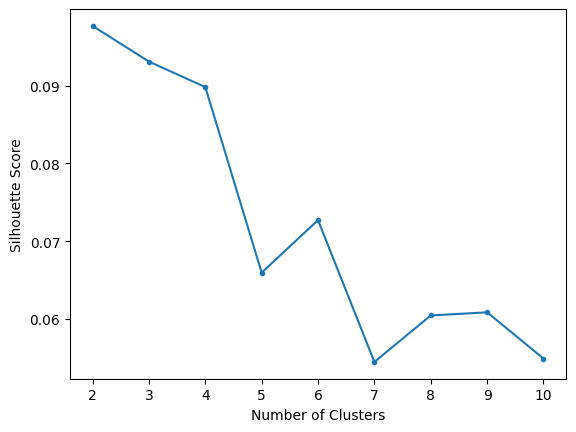

In [28]:
## Creating Silhouette Visualization
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_scaled)
  silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [29]:
## Creating model with 4 clusters 
model = KMeans(n_clusters = 4, random_state = 42)
model.fit(df_scaled)
df_voters["cluster"] = model.labels_

In [30]:
## Visualizing means to review differences in both clusters 
cluster_groups = df_voters.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,case_identifier,accurately_counted_2016,accurately_counted2_2016,fav_trump_2016,fav_obama_2016,fav_hrc_2016,fav_sanders_2016,PARTY_AGENDAS_R1_2016,PARTY_AGENDAS_R2_2016,...,econtrend_2016,Americatrend_2016,futuretrend_2016,wealth_2016,values_culture_2016,US_respect_2016,trustgovt_2016,trust_people_2016,helpful_people_2016,fair_people_2016
0,0,6.367031e+07,2.645472,2.300578,1.183044,4.502890,4.109827,4.406551,3.323699,4.472062,...,2.722543,2.225434,1.921002,1.102119,1.703276,1.487476,1.005780,1.005780,1.770713,1.603083
1,1,4.896570e+07,3.078818,2.449918,1.032841,4.804598,4.300493,4.469622,1.807882,4.160920,...,3.379310,3.004926,2.019704,1.044335,2.725780,1.916256,1.001642,1.001642,2.372742,2.331691
2,2,5.938654e+07,3.089744,2.675214,1.294872,4.854701,4.487179,4.384615,2.380342,4.085470,...,3.465812,3.072650,2.423077,1.235043,2.525641,2.324786,2.089744,2.089744,2.414530,2.371795
3,3,6.042116e+07,2.844000,2.640000,1.484000,4.128000,3.824000,3.992000,3.008000,3.220000,...,3.028000,2.604000,2.504000,1.628000,2.096000,1.696000,1.108000,1.108000,2.068000,2.124000


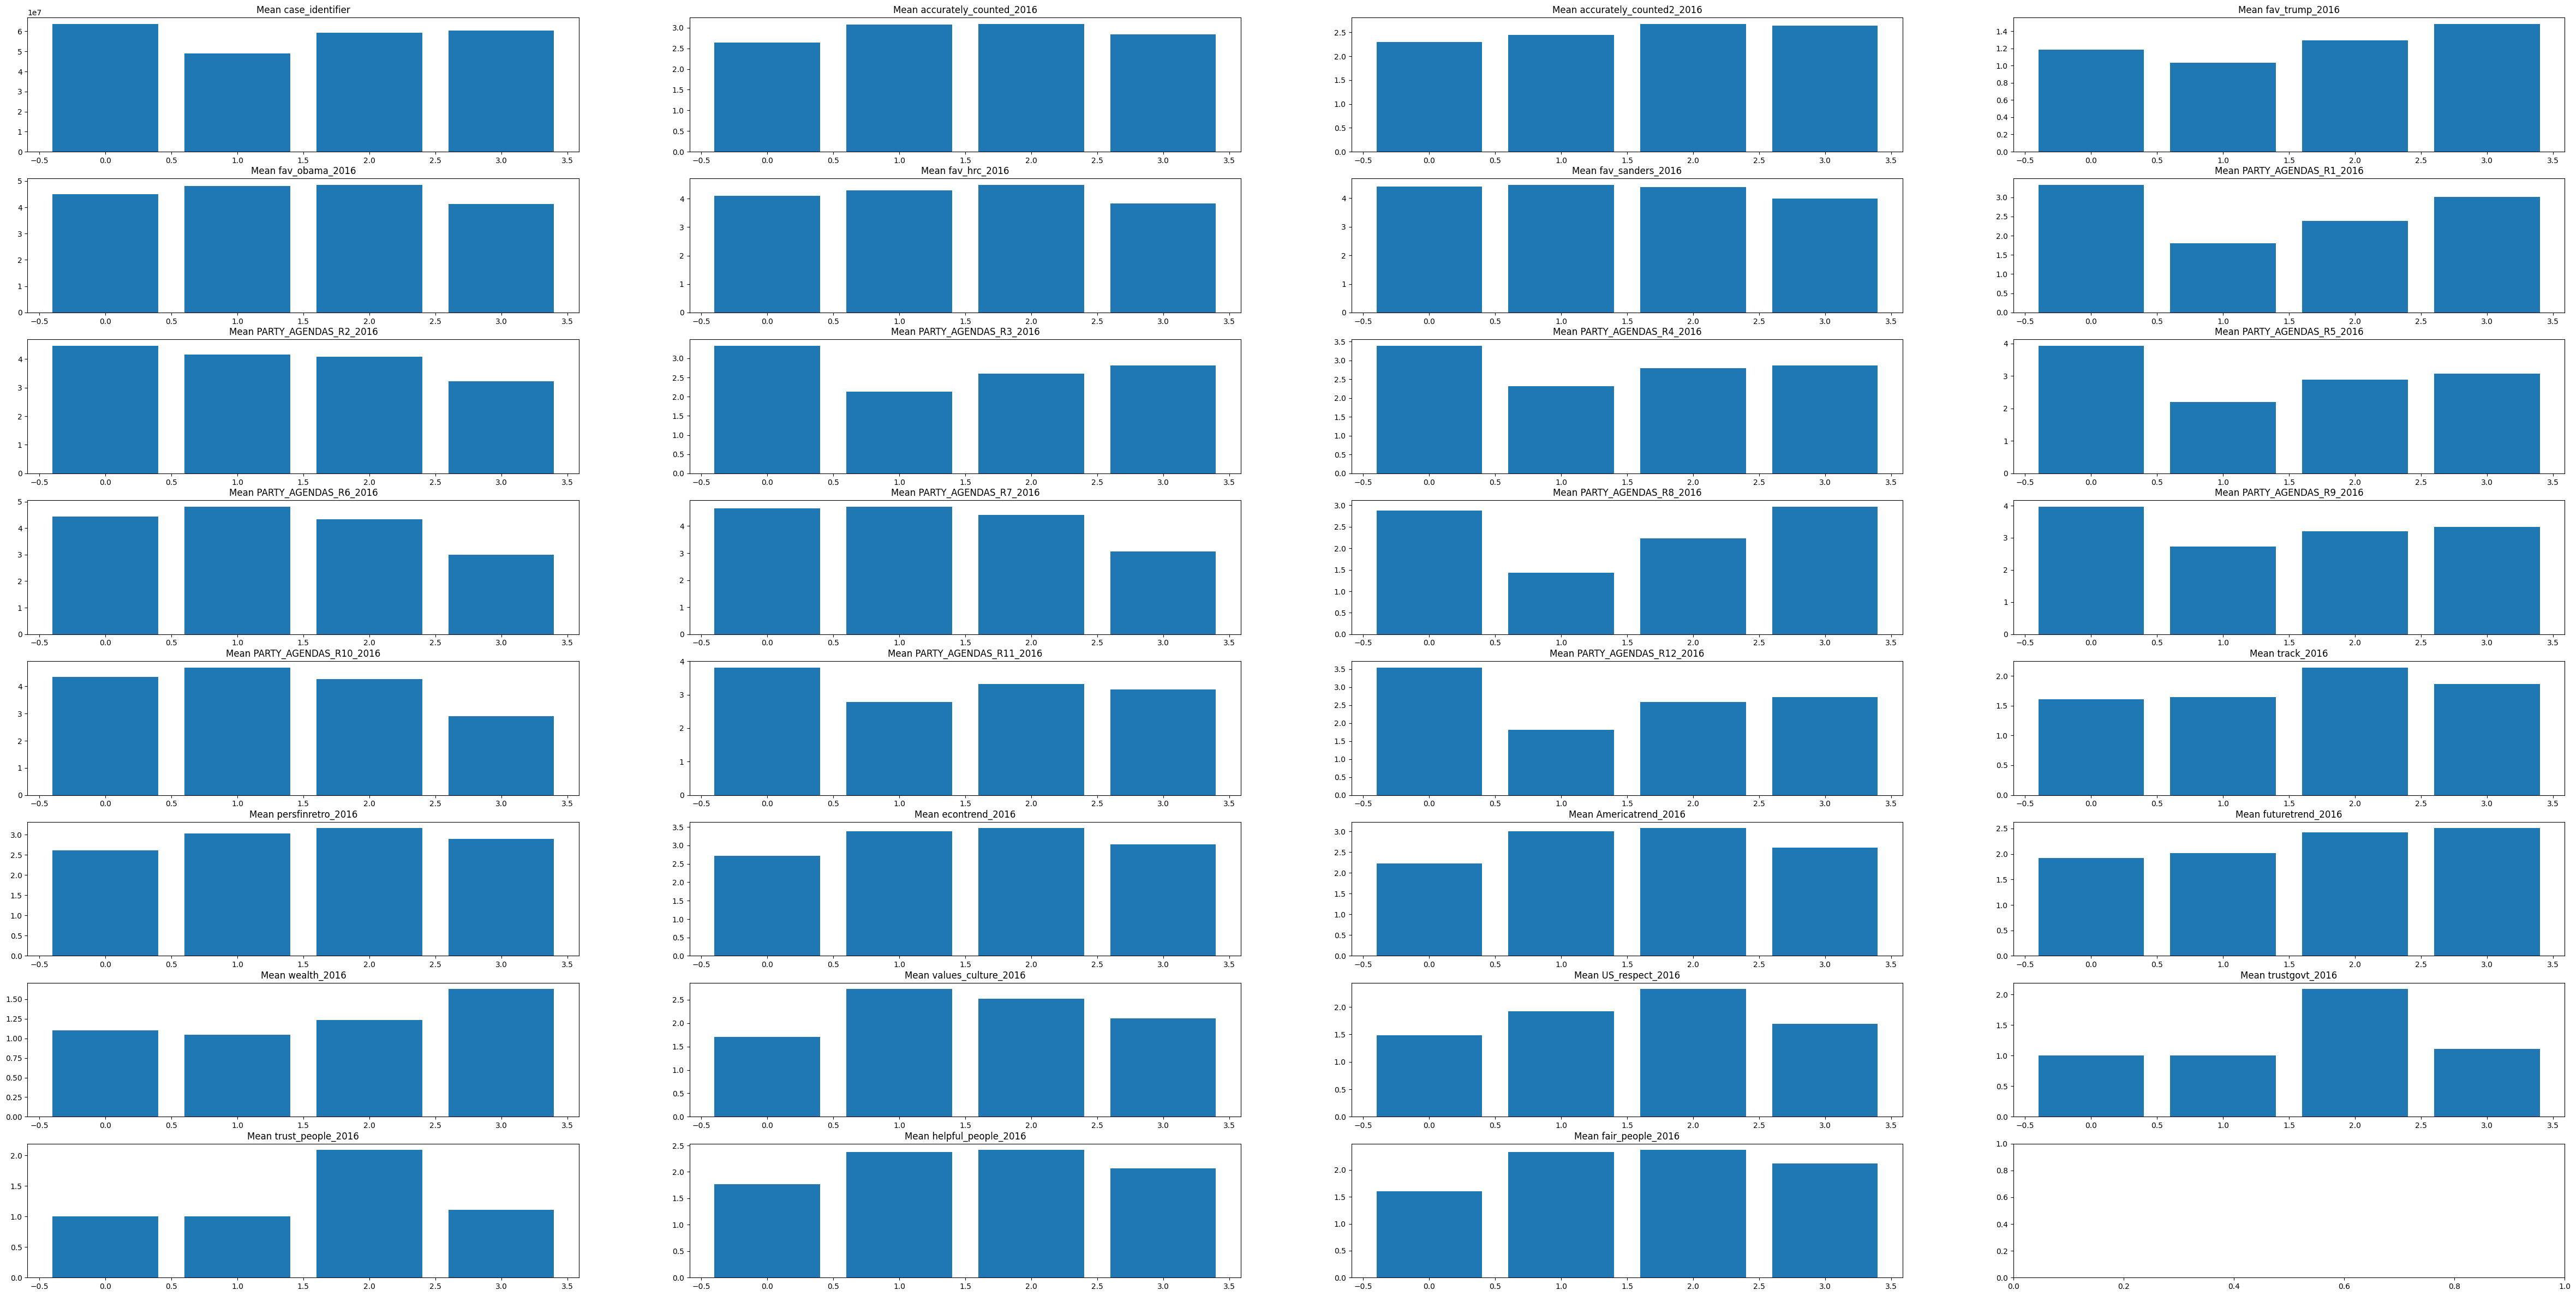

In [31]:
## Visualizing means to review differences in clusters 
cluster_groups = df_voters.groupby('cluster', as_index=False).mean()

# Visualize means 
fig, axes = plt.subplots(8,4, figsize = (60, 30))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

## Pairplots
---

Visualizing data in pairplots in order to see naturally clustering. 

In [32]:
df_voters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1612 entries, 0 to 1794
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   case_identifier           1612 non-null   int64
 1   accurately_counted_2016   1612 non-null   int64
 2   accurately_counted2_2016  1612 non-null   int64
 3   fav_trump_2016            1612 non-null   int64
 4   fav_obama_2016            1612 non-null   int64
 5   fav_hrc_2016              1612 non-null   int64
 6   fav_sanders_2016          1612 non-null   int64
 7   PARTY_AGENDAS_R1_2016     1612 non-null   int64
 8   PARTY_AGENDAS_R2_2016     1612 non-null   int64
 9   PARTY_AGENDAS_R3_2016     1612 non-null   int64
 10  PARTY_AGENDAS_R4_2016     1612 non-null   int64
 11  PARTY_AGENDAS_R5_2016     1612 non-null   int64
 12  PARTY_AGENDAS_R6_2016     1612 non-null   int64
 13  PARTY_AGENDAS_R7_2016     1612 non-null   int64
 14  PARTY_AGENDAS_R8_2016     1612 non-null 

In [33]:
## Downloading file 
from google.colab import files
test = df_voters.to_csv("Test.csv")
files.download('Test.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
## Creating Dictionary of all average values for the clusters 
Cluster_one = cluster_groups.loc(cluster_groups["cluster"] == 1)
Cluster_one.head

##cluster_groups["accurately_counted_2016"].value_counts()

TypeError: ignored